In [1]:
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from skimage import measure,morphology
from skimage.measure import regionprops
import matplotlib.patches as patches
import cv2 as cv

In [2]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=7f1765830439e4452f40659849ddeae0a0b9384fd3ef2c3ddeeb3d6790664493
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [3]:
import pytesseract

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
def show(image):
  plt.figure(figsize=(20,10))
  plt.imshow(image, cmap='gray')

In [6]:
car_image = imread("/content/drive/MyDrive/University/Computer Vision/Project/Plate Detection/plates.png")

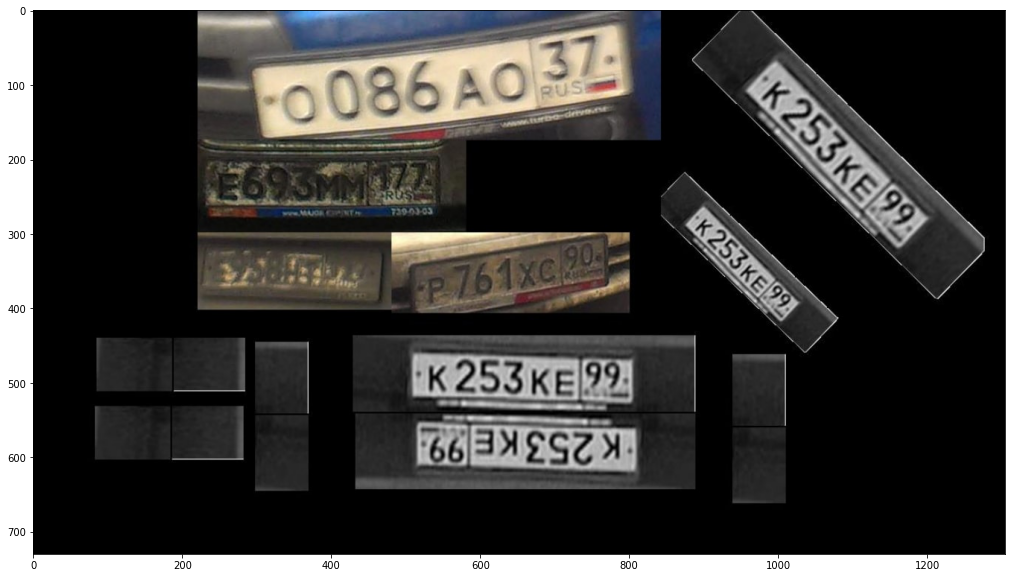

In [7]:
show(car_image)

In [8]:
height, width, _ = car_image.shape

In [9]:
gray = cv.cvtColor(car_image, cv.COLOR_BGR2GRAY)

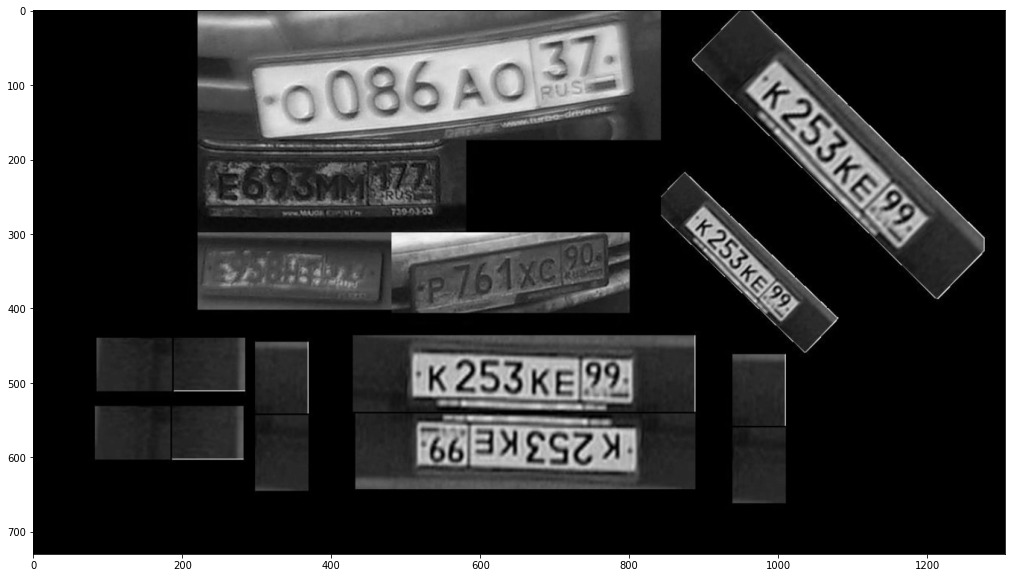

In [10]:
show(gray)

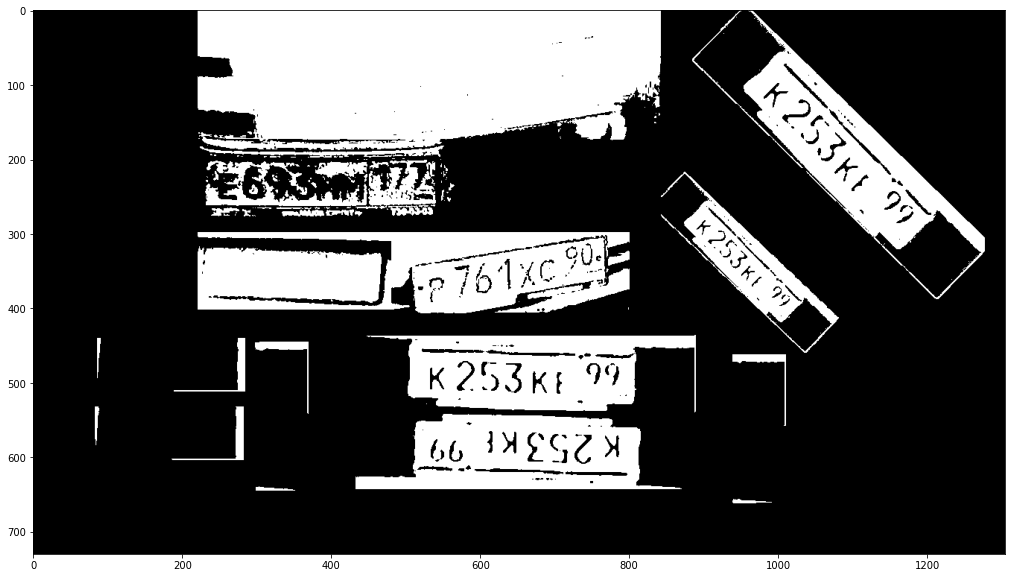

In [21]:
# Установление пороговых значений

threshold = threshold_otsu(gray)*0.7
bin = gray > threshold
show(bin)

In [12]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,878 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

 

 

 

 

 


‘K253KE

—i9\l mo



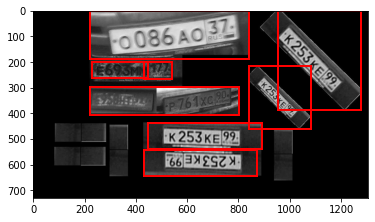

In [13]:
# объединяет все связанные регионы и группирует их вместе
label_image = measure.label(bin)
fig, (ax1) = plt.subplots(1)
ax1.imshow(gray, cmap="gray")
# regionprops создает список свойств всех помеченных регионов
for region in regionprops(label_image):
    if region.area <= 2500:
        # Если регион такой маленький, то, скорее всего, это не номерной знак
        continue
    # координаты рамки
    minRow, minCol, maxRow, maxCol = region.bbox
    x, y , w, h = minCol, minRow, maxCol-minCol, maxRow-minRow
    img = gray[y:y+h, x:x+w]
    result = pytesseract.image_to_string(img, lang="rus+eng")
    print(result)
    rectBorder = patches.Rectangle((minCol, minRow), w, h, edgecolor="red", linewidth=2, fill=False)
    ax1.add_patch(rectBorder)
plt.show()

In [14]:
# https://colab.research.google.com/github/chiachun2491/NTUST_EdgeAI/blob/main/demo.ipynb#scrollTo=v70rR6ohv-UE
# https://habr.com/ru/post/432444/
# 